In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


y=0.168000x+(81.400000)


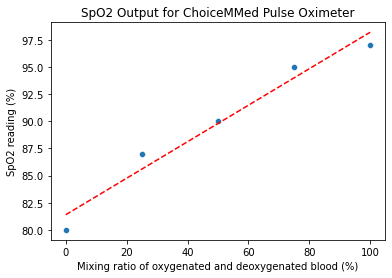

In [5]:
# Data from ####

x = [0, 25, 50, 75, 100]
y = [80,87,90,95, 97]

xlabel = 'Mixing ratio of oxygenated and deoxygenated blood (%)'
ylabel = 'SpO2 reading (%)'
title = 'SpO2 Output for ChoiceMMed Pulse Oximeter'

sns.scatterplot(x=x, y=y)#
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

9    2021-05-19 16:00:43.994722128
19   2021-05-19 16:01:24.062393188
29   2021-05-19 16:02:04.115850925
39   2021-05-19 16:02:44.180011034
49   2021-05-19 16:03:24.249377012
59   2021-05-19 16:04:04.304368973
Name: date, dtype: datetime64[ns]
y=-0.079450x+(9.294118)


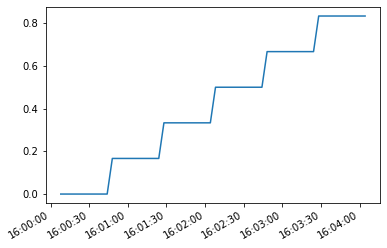

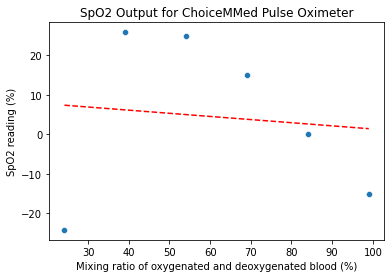

In [34]:
# Data from 19 May 2021

df = pd.read_csv('Data_210519/PO_20210519_1704.csv')

length = len(df)
df['date'] = pd.to_datetime(df['time'],unit='s')
mixing_ratio = [int(i/length * 6)/6 for i in range(length)]

#df.plot('time', 'pump_mixing_ratio')
plt.plot(df['date'], mixing_ratio)
plt.gcf().autofmt_xdate()

plt.figure()
input_oxygenation = np.linspace(24.2, 99, 6)
input_pulse = [6] * 6
output_oxygenation = [0, 65, 79, 84, 84, 84]
output_poulse =      [0, 44, 65, 59, 52, 52]

change = [a != b for a,b in zip(mixing_ratio[1:], mixing_ratio[:-1])] + [True] # include last time-stamp

print(df['date'].iloc[change])

xlabel = 'Mixing ratio of oxygenated and deoxygenated blood (%)'
ylabel = 'SpO2 reading (%)'
title = 'SpO2 Output for ChoiceMMed Pulse Oximeter'

sns.scatterplot(x=input_oxygenation, y=(output_oxygenation-input_oxygenation))#
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

# calc the trendline
z = np.polyfit(input_oxygenation, output_oxygenation-input_oxygenation, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))


9    2021-05-19 16:00:43.994722128
19   2021-05-19 16:01:24.062393188
29   2021-05-19 16:02:04.115850925
39   2021-05-19 16:02:44.180011034
49   2021-05-19 16:03:24.249377012
59   2021-05-19 16:04:04.304368973
Name: date, dtype: datetime64[ns]
y=0.920550x+(9.294118)


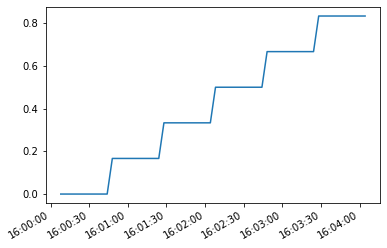

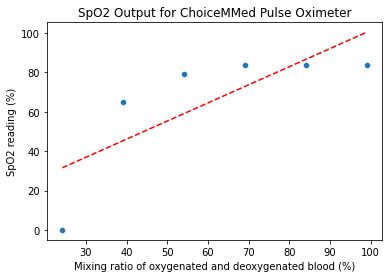

In [35]:
df = pd.read_csv('Data_210519/PO_20210519_1704.csv')

length = len(df)
df['date'] = pd.to_datetime(df['time'],unit='s')
mixing_ratio = [int(i/length * 6)/6 for i in range(length)]

#df.plot('time', 'pump_mixing_ratio')
plt.plot(df['date'], mixing_ratio)
plt.gcf().autofmt_xdate()

plt.figure()
input_oxygenation = np.linspace(24.2, 99, 6)
input_pulse = [6] * 6
output_oxygenation = [0, 65, 79, 84, 84, 84]
output_poulse =      [0, 44, 65, 59, 52, 52]

change = [a != b for a,b in zip(mixing_ratio[1:], mixing_ratio[:-1])] + [True] # include last time-stamp

print(df['date'].iloc[change])

xlabel = 'Mixing ratio of oxygenated and deoxygenated blood (%)'
ylabel = 'SpO2 reading (%)'
title = 'SpO2 Output for ChoiceMMed Pulse Oximeter'

sns.scatterplot(x=input_oxygenation, y=output_oxygenation)#
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

# calc the trendline
z = np.polyfit(input_oxygenation, output_oxygenation, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

(70.0, 100.0)

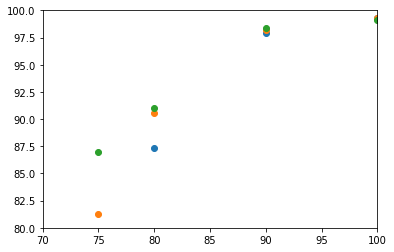

In [3]:
def severinghoouse(x):
    if x == 0:
        return 0
    return ((((x**3+150*x)**-1 * 23400)+1)**-1) * 100


x = [100,75, 50, 25, 0, 90, 80, 70, 60]
y1 = [150, 38.1, 25.5, 23.9, 20.8, 102, 53.5, 30.8, 27.4]
y2 = [148, 45.6, 29.1, 24.8, 24.2, 108, 59.9, 38.1, 28.2]
y3 = [138,53,27,24.4,18.9,113,61,37,27.7 ]

t1 = '14:05'
t2 = '15:05'
t3 = '16:25'

spo2_1 = [severinghoouse(i) for i in y1]
spo2_2 = [severinghoouse(i) for i in y2]
spo2_3 = [severinghoouse(i) for i in y3]

plt.plot(x,spo2_1, 'o')
plt.plot(x,spo2_2, 'o')
plt.plot(x,spo2_3, 'o')
plt.ylim([80,100])
plt.xlim([70,100])

In [4]:
severinghoouse(48)

83.42682304946456

Things to investigate:
- Overall transmittence of the phantom (match human finger)
    - Characerizes print
    - Informs us of gel-wax thickness/scattering compond concentration
- 

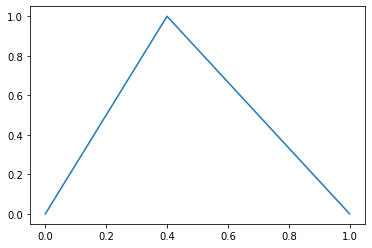

In [18]:
a_s = [0, 1, 0]
t_s = [0, 4, 10]

t_s = np.array(t_s)/max(t_s)
a_s = np.array(a_s)/max(a_s)

plt.plot(t_s, a_s)